# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [2]:
#install spacy in the current conda environment
#!pip3 install spacy


In [3]:
#download a small language model to help with cleaning tasks
#!python3 -m spacy download en_core_web_sm

In [4]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [5]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [6]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [7]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [8]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [9]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [10]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [11]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [12]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [13]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

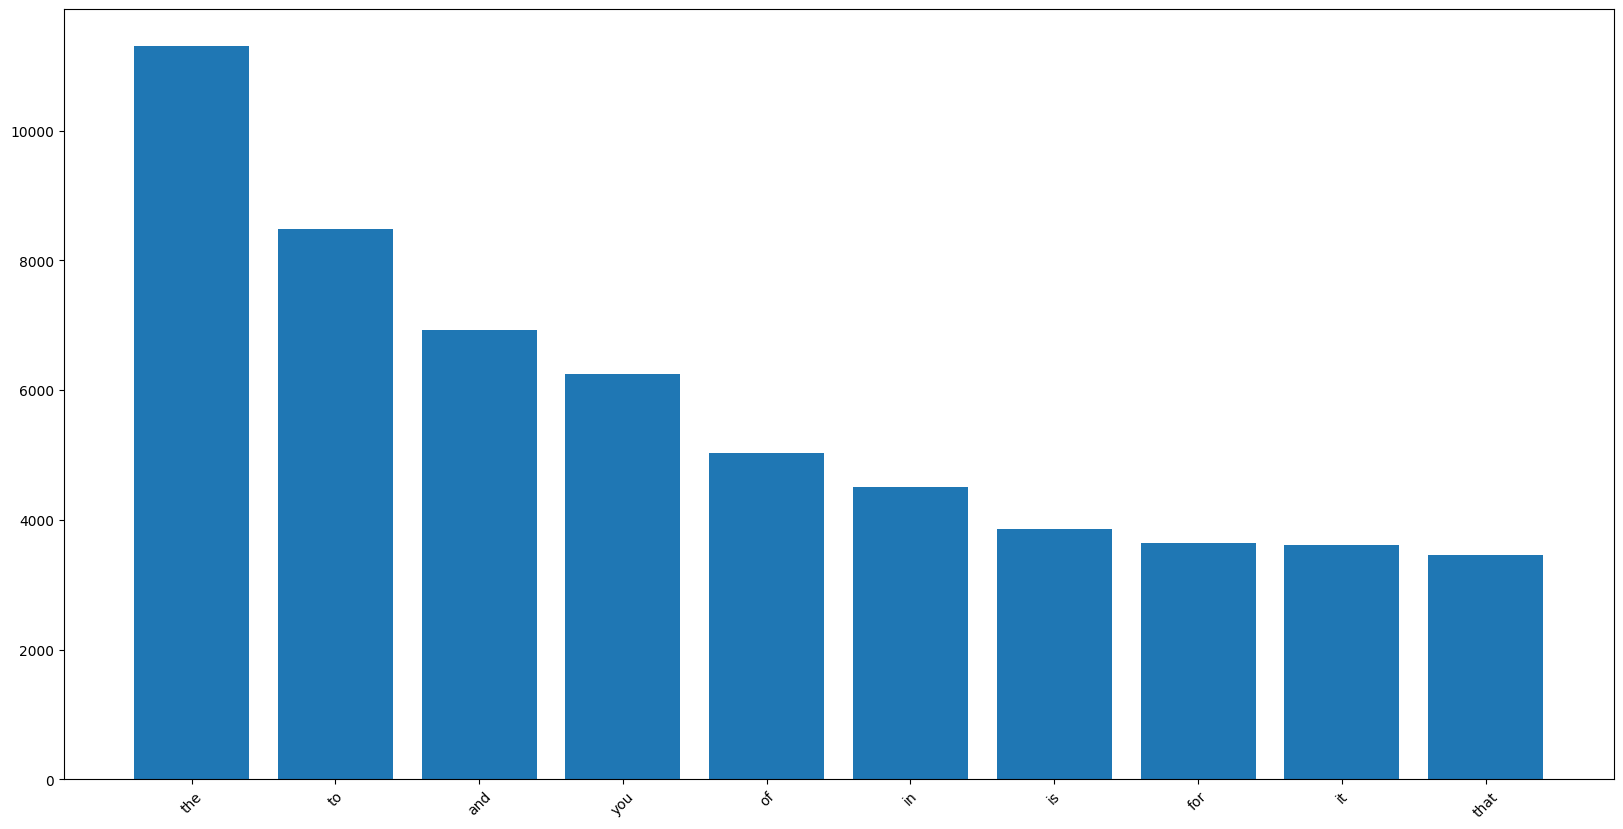

In [15]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: No. The reason is that the most common use of these grammatical vocabularies will likely follow the same pattern regardless of the post content. Thus these words do not reveal the content of these reddits. 

#### Lemmatization and stopword removal

In [16]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [17]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [18]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [19]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [20]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [21]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

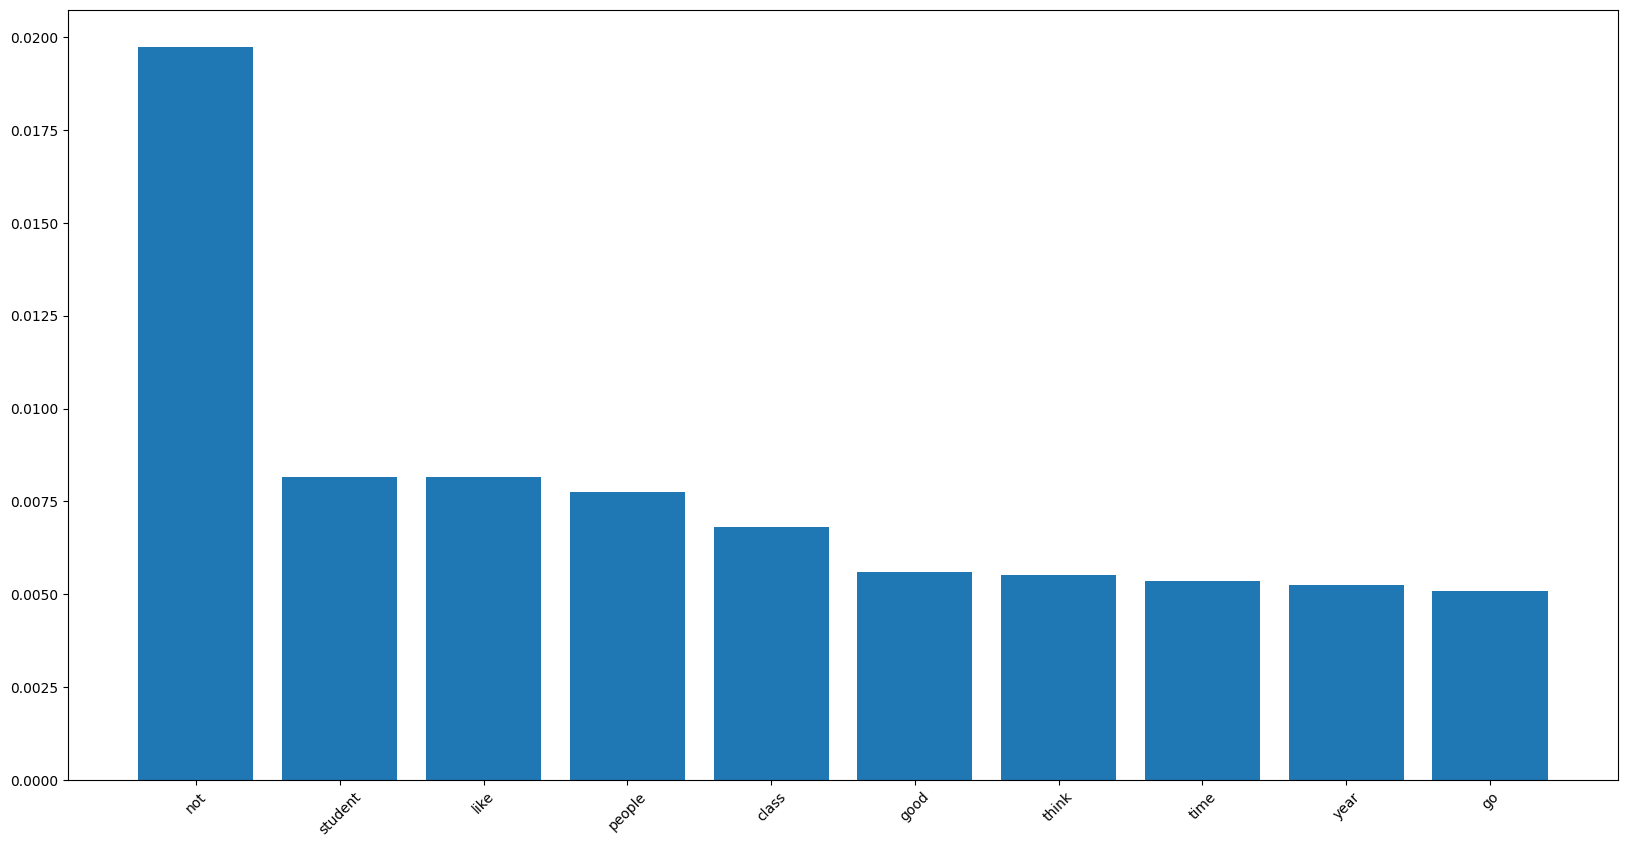

In [22]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [23]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.1400153180566765e-05

In [24]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

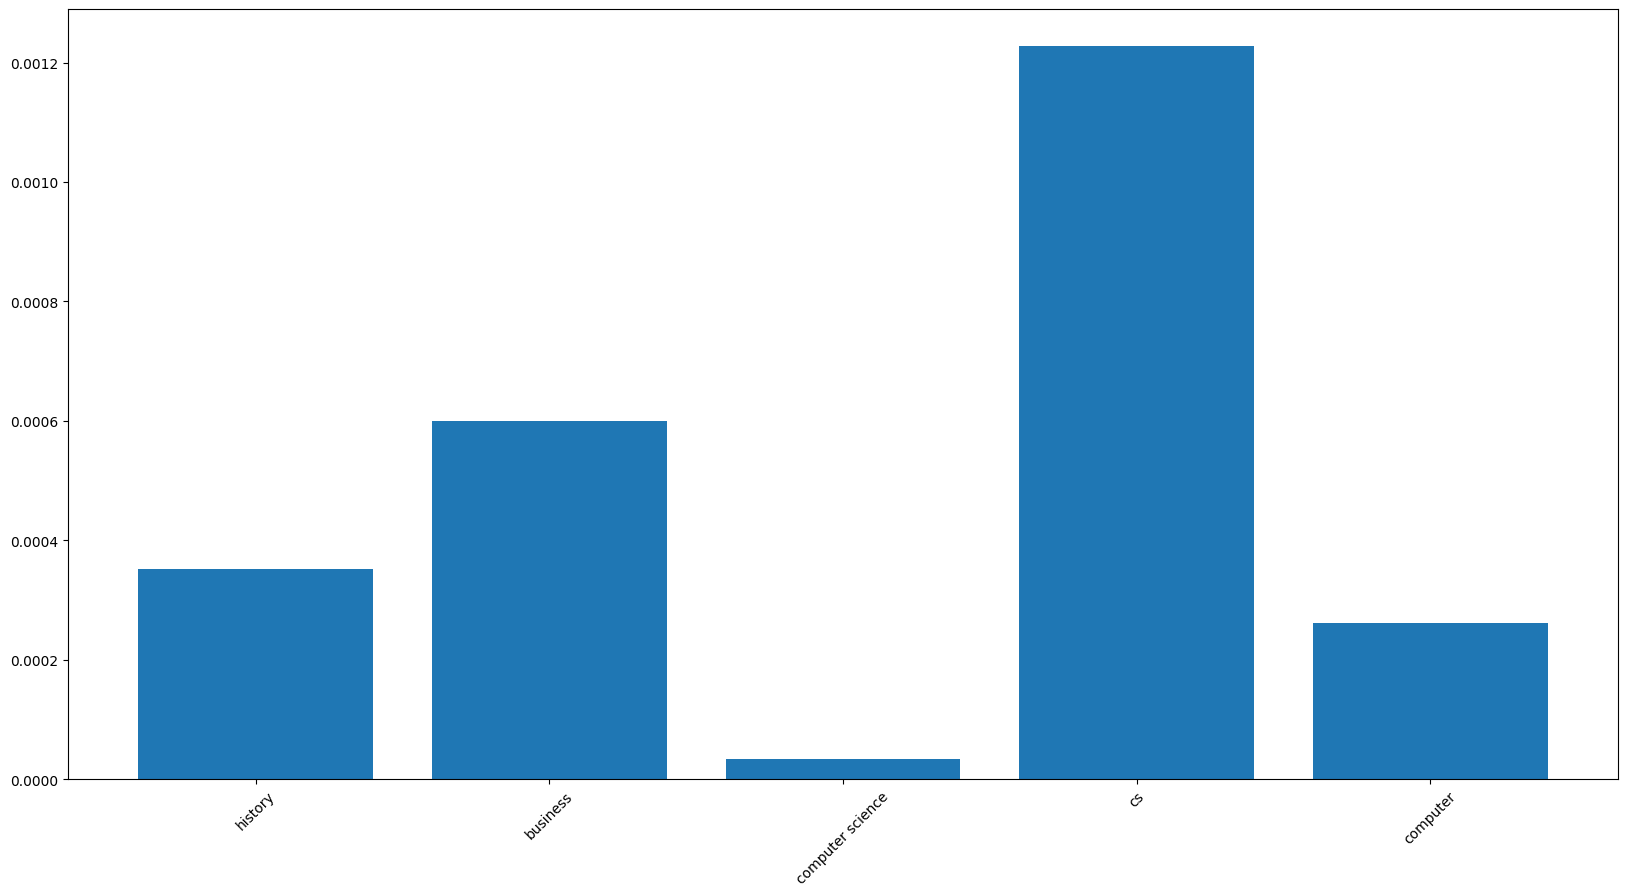

In [25]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [26]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

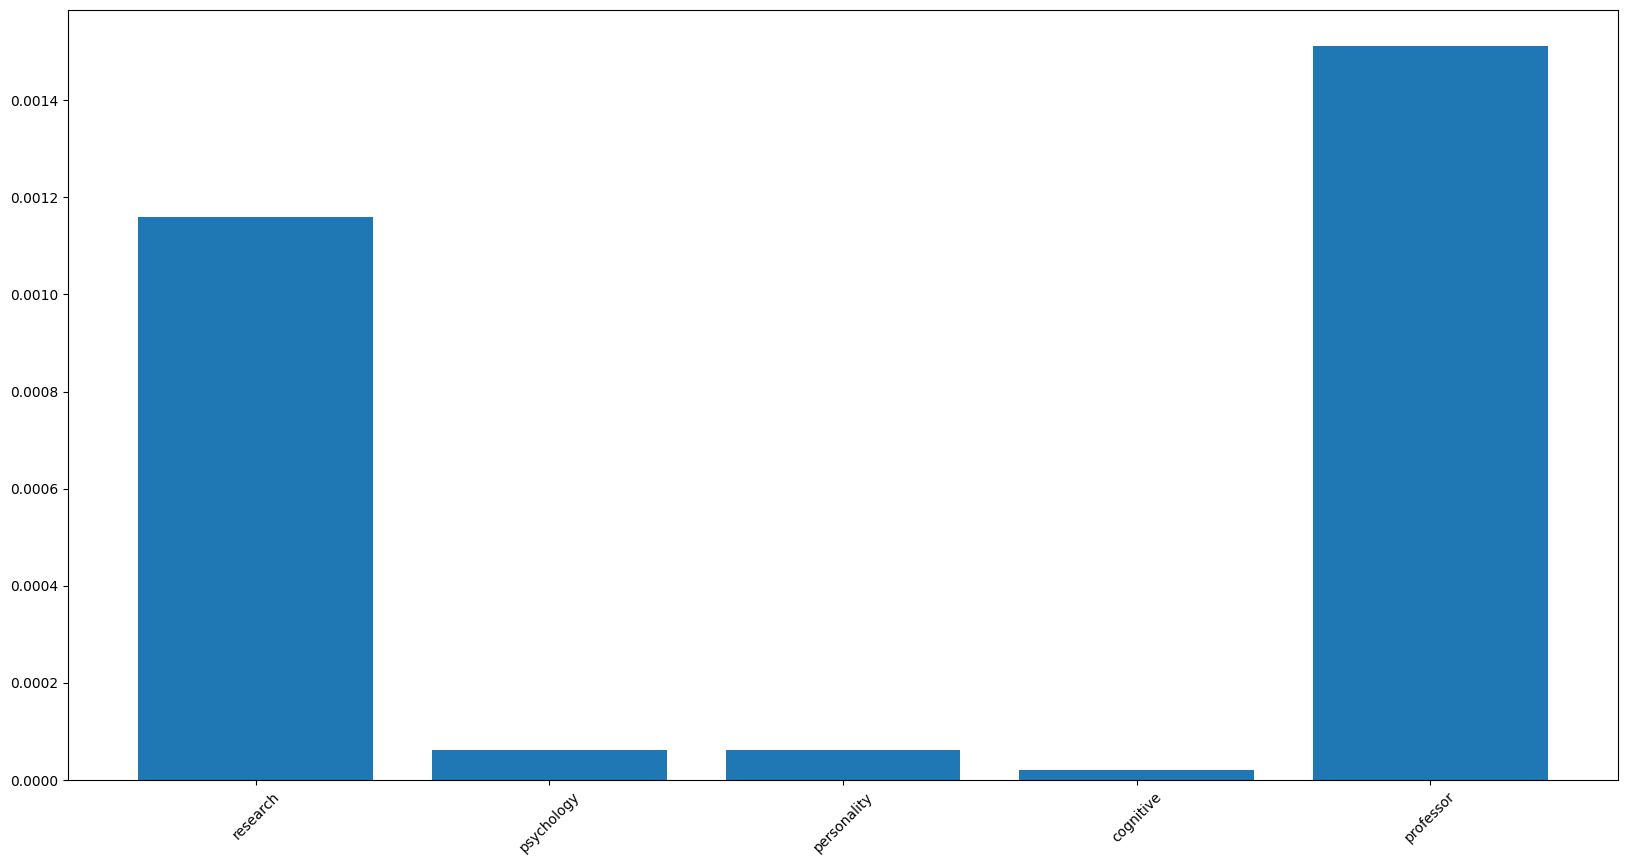

In [27]:
plot_list=word_counts[["research", "psychology", "personality", "cognitive", "professor"]]
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [28]:
uiuc=pd.read_csv("uiuc.csv")

In [29]:
uiuc['cleaned_text'] = uiuc['text'].apply(clean)
bag_of_words = vectorizer.fit_transform(uiuc['cleaned_text'])
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts = word_counts / word_counts.sum()

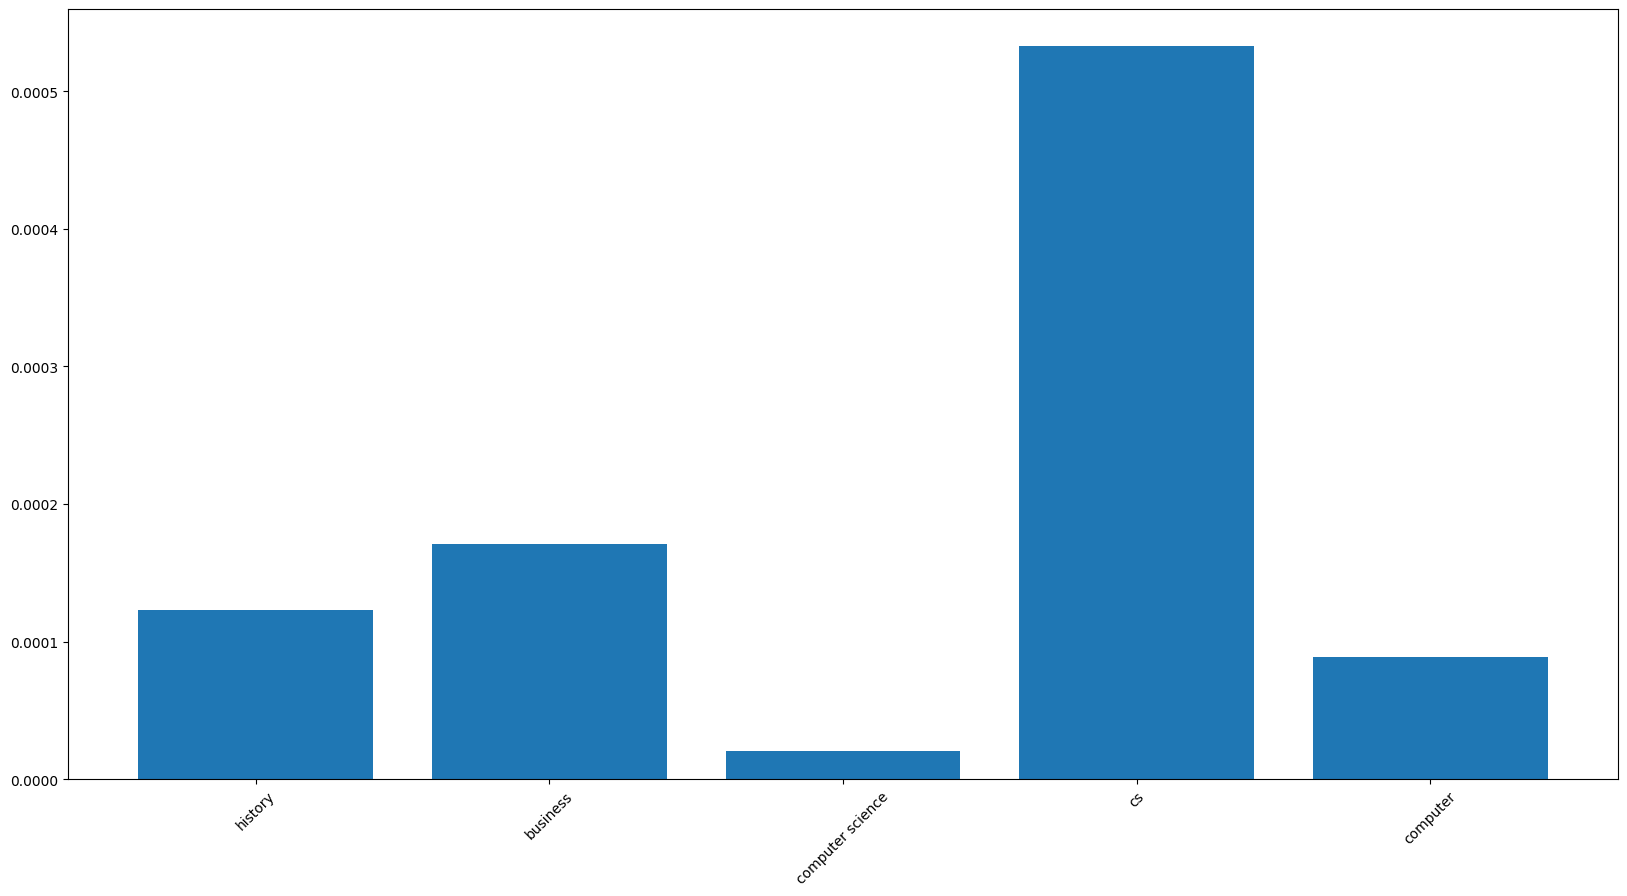

In [30]:
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

The relative ratio amongst these five words are similar in both the UMich dataset and our dataset, with "cs" being the highest and "computer science" being the lowest. An interesting finding is that the percentage of these words are much lower in the U of I reddits. It would be interesting to investigate what other majoris more popular for U of I students.  

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [31]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])
data

,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1
...,...,...,...,...,...,...,...
332,332,2024-09-03 16:32:49,20,Yeah that’s the gist of it (coming from an eng...,KeepCalmAndSnorlax,7,0
2280,2280,2024-08-26 21:42:03,417,You can literally see the data on SAT correlat...,slatibartifast3,1,0
3635,3635,2024-08-17 05:47:52,40,Just noting that political engagement only com...,BadgersHoneyPot,20,0
2018,2018,2024-08-27 13:36:27,129,"I knew, but I chose to take it literally 😅",CovfefeBoss,5,0


In [32]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)
##data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [33]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3)
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

y_pred = model.predict(X)

In [35]:
#report the accuracy of the model
accuracy_score(y, y_pred)

0.8841269841269841

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [36]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
vectorizer = CountVectorizer(min_df=3, max_df=0.3)
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.692063492063492

#### Part 3: Examine the top features of your model using the following code

In [37]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [38]:
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

In [39]:
top_10_negative

,feature,coefficient
2252,gsi,-1.767468
3147,mcard,-1.783633
4462,ross,-1.810169
5255,texas,-1.813905
5705,waitlist,-1.832588
214,ann,-1.834283
1586,eecs,-1.983786
5510,umich,-2.563613
2054,fresno,-2.600249
3220,michigan,-2.929601


In [40]:
top_10_positive

,feature,coefficient
5504,uiuc,2.849523
2533,illinois,2.143637
801,champaign,2.046333
2212,grainger,1.988553
5589,urbana,1.985031
4475,rsos,1.894095
2532,illini,1.852416
1236,danville,1.780771
2848,las,1.694803
5749,water,1.635090


In [41]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

They do make sense, as the top 10 words classified as UIUC are very school related words that indicates features of uiuc, e.g. uiuc, illinois, grainger, urbana, champaign. On the otther hand, the Michigan one is either a little confusing or I am just not familiar with what is around UMich. 

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [42]:
#!pip3 install gensim

In [53]:
df=pd.read_csv('IMDB Dataset.csv')
df["review"] = df["review"].apply(clean)
df["sentiment"] = df["sentiment"].apply(lambda x: 1 if x=="positive" else 0)
X = vectorizer.fit_transform(df["review"])

In [62]:
df

,review,sentiment
0,one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side,1
1,a wonderful little production br br the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done,1
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovebr br this was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanbr br this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends,1
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the timebr br this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombiebr br ok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his clos

In [54]:
from scipy.sparse import csr_matrix
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus
X_sparse = csr_matrix(X)
corpus = Sparse2Corpus(X_sparse, documents_columns=False)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [55]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)
lda_model.print_topics()

[(0,
  '0.007*"films" + 0.007*"which" + 0.007*"story" + 0.006*"their" + 0.005*"characters" + 0.005*"into" + 0.004*"than" + 0.004*"most" + 0.004*"other" + 0.004*"these"'),
 (1,
  '0.059*"her" + 0.041*"she" + 0.008*"love" + 0.006*"him" + 0.006*"woman" + 0.005*"story" + 0.004*"girl" + 0.004*"their" + 0.004*"young" + 0.004*"shes"'),
 (2,
  '0.009*"we" + 0.008*"life" + 0.007*"him" + 0.006*"their" + 0.005*"which" + 0.005*"man" + 0.004*"will" + 0.004*"into" + 0.004*"us" + 0.003*"how"'),
 (3,
  '0.010*"war" + 0.009*"series" + 0.007*"their" + 0.006*"episode" + 0.006*"were" + 0.005*"first" + 0.005*"which" + 0.004*"had" + 0.004*"after" + 0.004*"years"'),
 (4,
  '0.006*"into" + 0.006*"him" + 0.005*"which" + 0.005*"then" + 0.004*"off" + 0.004*"scene" + 0.004*"theres" + 0.004*"plot" + 0.004*"get" + 0.004*"after"'),
 (5,
  '0.012*"show" + 0.009*"great" + 0.006*"him" + 0.006*"best" + 0.004*"get" + 0.004*"their" + 0.004*"comedy" + 0.004*"music" + 0.004*"love" + 0.004*"funny"'),
 (6,
  '0.009*"people" +

#0 a novel being made into a film discussion 

#1 high school soap opera related story

#2 life thinking related

#3 war movie 

#4 some sort of tv series 

#5 disney channel shows 

#6 stand up comedy debate

#7 bad movies 

#8 discussion of some movie 

#9 horror / thriller movies

In [56]:
import textwrap

pd.set_option('display.max_colwidth', None)
toprint = df['review'][30]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

taut and organically gripping edward dmytryks crossfire is a distinctive
suspense thriller an unlikely message movie using the look and devices of the
noir cyclebr br bivouacked in washington dc a company of soldiers cope with
their restlessness by hanging out in bars three of them end up at a strangers
apartment where robert ryan drunk and belligerent beats their host sam levene to
death because he happens to be jewish police detective robert young investigates
with the help of robert mitchum whos assigned to ryans outfit suspicion falls on
the second of the three george cooper who has vanished ryan slays the third
buddy steve brodie to insure his silence before young closes inbr br abetted by
a superior script by john paxton dmytryk draws precise performances from his
three starring bobs ryan naturally does his prototypical angry white male and to
the hilt while mitchum underplays with his characteristic alert nonchalance his
role however is not central young may never have been bett

In [57]:
lda_model.get_document_topics(corpus[30])

[(0, 0.059188373),
 (1, 0.15269764),
 (2, 0.46970394),
 (3, 0.072848395),
 (4, 0.17545421),
 (5, 0.06847273)]

In [60]:
models=lda_model.get_document_topics(corpus, minimum_probability=0)
rows=[]
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)
topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9
19815,0.001222,0.001222,0.001222,0.937656,0.001222,0.052569,0.001223,0.001222,0.001222,0.001222
48927,0.010006,0.010007,0.010007,0.909938,0.010006,0.010009,0.010006,0.010007,0.010007,0.010007
39182,0.010006,0.010007,0.010007,0.909936,0.010006,0.010011,0.010006,0.010007,0.010007,0.010007
47459,0.084234,0.001855,0.001856,0.900923,0.001856,0.001855,0.001855,0.001855,0.001855,0.001855
26626,0.002441,0.002441,0.092162,0.888307,0.002441,0.002441,0.002441,0.002442,0.002441,0.002441
...,...,...,...,...,...,...,...,...,...,...
32592,0.023135,0.071416,0.552582,0.000148,0.025232,0.009109,0.163779,0.154302,0.000148,0.000148
18594,0.051119,0.000139,0.043643,0.000139,0.311205,0.040065,0.370487,0.105742,0.019196,0.058265
14797,0.517259,0.107268,0.269504,0.000137,0.060652,0.000137,0.037605,0.000137,0.000137,0.007165
1531,0.086697,0.053272,0.440583,0.000136,0.015236,0.041088,0.001745,0.360971,0.000136,0.000136


In [61]:
pd.set_option('display.max_colwidth', None)
toprint=df['review'][6540]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

a hotheaded cop accidentally kills a murder suspect and then covers up the crime
but must deal with a guilty conscience while he tries to solve a murder case
andrews and tierney are reunited with director preminger in a film noir that is
as effective as laura their earlier collaboration andrews is perfectly cast as
the earnest cop a good guy caught up in unfortunate circumstances the acting is
fine all around including malden as a tough police captain and tully as tierneys
protective father the screenplay by hecht a great and prolific screenwriter is
taut and suspenseful and preminger creates a great atmosphere


I labeled #2 topic as discussion about life, I would say the comment (0.46970394 #2) does not fall under the topic. 